# Python-in-the-lab: classes I

In [1]:
import os
import numpy as np
import scipy.integrate as integrate
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
# Today we use the same file of the shapes
filename = "F64ac_0.02_time_V_T.dat"
filename = os.path.join(mainDir, filename)
data = np.loadtxt(filename, comments="#")
time = data[:,0]
with open(filename) as f:
    header = f.readline()
sizes = [float(size) for size in header.split()[1:]]
shapes = dict()
for i, size in enumerate(sizes):
    shapes[size] = data[:,i+1]

## Introduction to classes

In [3]:
# Introduction to classes
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = integrate.trapz(y,x)
    
    def y_norm(self):
        return self.y/self.norm

In [4]:
s1 = Shape(shapes[0.000159],time)

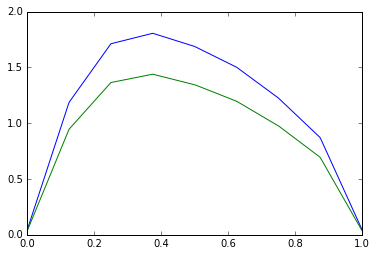

In [5]:
plt.plot(s1.x, s1.y, s1.x, s1.y_norm())

In [8]:
# Introduction to classes: your first (and only) decorator
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = integrate.trapz(y,x)
    
    @property
    def y_norm(self):
        return self.y/self.norm

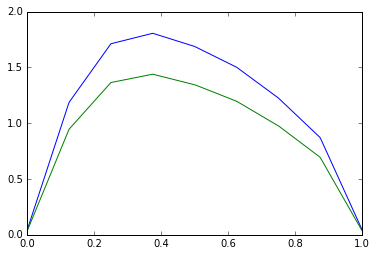

In [9]:
s1 = Shape(shapes[0.000159],time)
plt.plot(s1.x, s1.y, s1.x, s1.y_norm)

In [12]:
# To keep the order of the keys
from collections import OrderedDict
dictShapes = OrderedDict()

for i,size in enumerate(sizes):
    dictShapes[size] = Shape(data[:,i+1], time) # What is this? A dictionary of clasess??

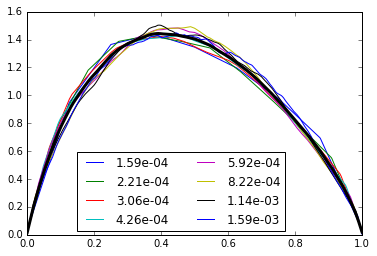

In [13]:
average = 0
for size in dictShapes:
    s = dictShapes[size]
    label = "{0:.2e}".format(size)
    plt.plot(s.x, s.y_norm, label=label)
    average += s.y_norm
average /= len(dictShapes)
plt.plot(time, average,'k',lw=3)
plt.legend(loc=(.15,.015),ncol=2);

### Classes can redefine operations

In [32]:
class Rectangle:
    """
    This class defines operations on Rectangles
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height
        self.area = base * height
        self.p = self._get_perim()
        self._diagonal = (base*base + height * height)**0.5 
    
    def _get_perim(self, half=False):
        """
        Get the perimeter of the Rectange
        Parameters:
        ----------
        half: Bool.
             If True, get the semiperimeter
        """
        p = self.base + self.height
        if half:
            return p
        else:
            return 2 * p
        
    def print_perimeter(self):
        return "The perimeter is %f" % self.p
    
    def __add__(self, other):
        base = self.base + other.base
        height = self.height + other.height
        return Rectangle(base,height)
    
    def __repr__(self):
        return "Rectangle of {0} by {1}".format(self.base, self.height)

p0 = Rectangle(3,2)
p1 = Rectangle(1,1)
p2 = Rectangle(2,0.5)

In [33]:
print p0.base, p0.height, p0.p, p0.area
p0.print_perimeter()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-33-53d23a1eb001>, line 1)

In [ ]:
# Construct a larger Rectange
p3 = p0 + p1
print p3.base, p3.height, p3.p, p3.area

In [ ]:
p3